In [38]:
import pandas as pd
import numpy as np 

from gensim import corpora
from gensim.models import LsiModel
from gensim.utils import simple_preprocess
from gensim.matutils import corpus2dense, corpus2csc

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Latent Sematic Analysis (LSA)

In [39]:
data = pd.read_csv("data/preprocessed.csv")
X = data['clean_lyrics'].apply(str.split)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(X)
dictionary.filter_extremes(no_below= 0.1, no_above= 0.75)

corpus = [dictionary.doc2bow(doc) for doc in X]

# Perform LSA
lsa_model = LsiModel(corpus, id2word=dictionary, num_topics= 8)

# Print the topics
topics = lsa_model.print_topics(num_words=4)
for topic in topics:
    print(topic)



(0, '0.366*"says" + 0.214*"go" + 0.184*"mam" + 0.172*"know"')
(1, '-0.307*"says" + 0.265*"one" + 0.249*"de" + 0.191*"would"')
(2, '0.309*"thou" + -0.255*"de" + 0.253*"thee" + 0.244*"king"')
(3, '-0.476*"bloom" + -0.271*"bruce" + -0.188*"back" + -0.164*"silver"')
(4, '-0.504*"bloom" + 0.401*"bruce" + 0.226*"silver" + 0.214*"batman"')
(5, '0.308*"love" + 0.267*"got" + 0.221*"like" + 0.199*"get"')
(6, '-0.688*"lawrence" + -0.305*"ali" + -0.237*"sir" + -0.215*"allenby"')
(7, '0.713*"bond" + 0.319*"natalya" + 0.230*"alec" + 0.163*"boris"')


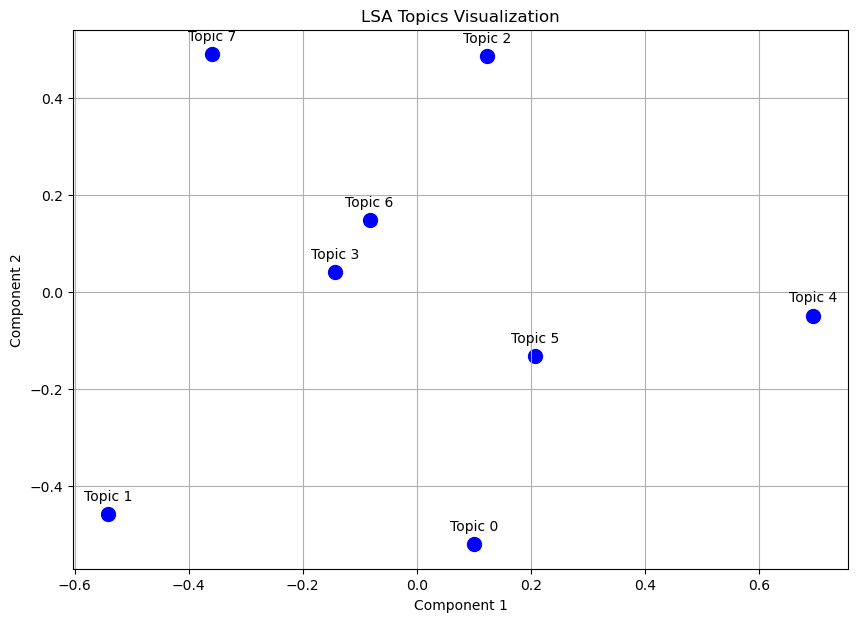

In [40]:
# Get topic vectors
topics = lsa_model.get_topics()  # Shape: (num_topics, num_words)

# Reduce dimensionality
def reduce_dimensionality(vectors, method='tsne'):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")
    
    reduced_vectors = reducer.fit_transform(vectors)
    return reduced_vectors

reduced_topics = reduce_dimensionality(topics, method='pca')  # or 'pca'

# Plotting
def plot_topics(reduced_vectors, topic_names):
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o', c='blue', s=100)
    
    for i, name in enumerate(topic_names):
        plt.annotate(name, (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                     textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title('LSA Topics Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Create topic names
topic_names = [f'Topic {i}' for i in range(lsa_model.num_topics)]

# Plot
plot_topics(reduced_topics, topic_names)

In [41]:
doc_topic = pd.DataFrame(corpus2csc(lsa_model[corpus]).toarray(), columns= data['Song ID']).T
doc_topic

,0,1,2,3,4,5,6,7
Song ID,,,,,,,,
0,2.912163,1.810967,-0.146591,-0.388234,-0.211033,1.200834,-0.225926,0.177176
1,2.563415,0.727184,-0.217518,-1.572496,0.466411,1.432108,0.117269,-0.089681
2,2.010538,0.509946,0.021265,-1.006815,-0.157846,3.537778,1.293306,-0.721394
3,1.916030,0.865142,-0.202333,-0.743594,-0.347506,2.202317,0.664728,-0.480052
4,2.364522,0.875374,-0.584163,-1.221062,0.234231,3.767334,1.087386,-0.390002
...,...,...,...,...,...,...,...,...
4835,8.079462,3.395501,-1.162338,-3.562189,1.275180,9.089274,3.184669,-0.863663
4836,7.096238,3.858657,-0.446063,-2.008683,0.079369,1.847667,0.280505,-0.260097
4837,8.070824,3.772840,-0.593309,-2.286620,1.135782,9.735638,2.674155,-0.837826


In [53]:
data['lsa_topic'].value_counts(normalize= True)

lsa_topic
0    0.558058
5    0.426446
1    0.014050
2    0.000826
4    0.000413
7    0.000207
Name: proportion, dtype: float64

<Axes: >

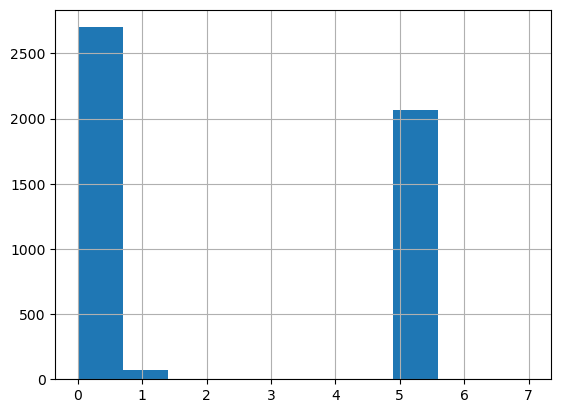

In [47]:
data['lsa_topic'] = np.argmax(doc_topic, axis= 1)
data['lsa_topic'].hist()

<Axes: xlabel='Year'>

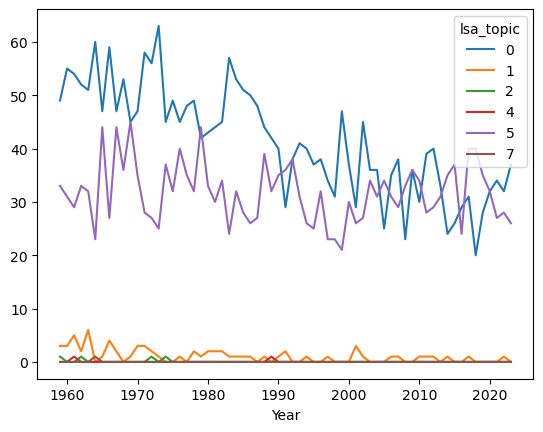

In [54]:
pd.pivot_table(data, index= "Year", columns= "lsa_topic", 
               values= "Song ID", aggfunc= "count").fillna(0).plot()

In [ ]:
data